# Getting started with Qiskit

Here, we provide an overview of working with Qiskit. 

Before we begin, let's make sure we have a working development environment

1. **Install anaconda.** https://www.anaconda.com/products/individual <br> <br>
    ***NOTE TO WINDOWS USERS***
    <blockquote>
    Unfortunately there is one package we will be using which does not play nicely with windows machines.  What we'll do instead is create a development environment inside of the Windows Subsystem for Linux (WSL) <br> <br>
  
    1. Open powershell as administrator and install wsl with `wsl --install` and choose to install Ubuntu (or your favorite linux distribution).  Set up a username/password for yourself
    
    2. Open wsl and download the Anaconda installation script `wget https://repo.anaconda.com/archive/Anaconda3-2021.11-Linux-x86_64.sh` <br>
    
    3. Run script with `bash Anaconda3`, following the prompts to complete the installation. <br> <br>
    4. Generally any files created in this environment exist in the directory `\\wsl$\Ubuntu\home\...` in your windows machine.  Feel free to write your codes and use github within this environment.  If you would like, you can also access files *outside* of wsl by going to the path `/mnt/c/Users/...`
    
   <b>Also note:</b> there is a bug when running the jupyter notebook from here.  Be sure to run `jupyter-notebook --no-browser` in order for it to run successfully.
    ***
    
    Additionally, we will need to download some C++ libraries for windows which aren't available by default either :( <br>
    1. Download and install the visual studio installer: https://visualstudio.microsoft.com/downloads/
    2. Under Visual Studio Build Tools, check the `Desktop development with C++` and additionally select 
        - MSCV v142 - VS 2019 C++ x86/64 build tools
        - Windows 10 SDK
        - C++ CMake tools for Windows
    <br> <br>
    3. Let the installer download and install the C++ libraries you've selected
    </blockquote>
    
    
2. **Install qiskit** <br>
    In the anaconda prompt type create a new environment using the command `conda create -n qiskit python=3`. Then activate the enviroment with `conda activate qiskit`. Finally install the package with `pip install qiskit` (or pip install qiskit[visualization])


3. **Create an IBMQ account** https://quantum-computing.ibm.com/ and obtain an API token so that you can run your circuits on real IBM quantum computers. <br>
<br>
4. **Install misc packages** Install the following packages to ensure all the lab notebooks will cooperate 
    1. `pip install matplotlib`
    2.`pip install pylatexenc`
    3. `pip install seaborn`
    4. `pip install ipywidgets`
    5. `pip install jupyter`
    6. `pip install qiskit-nature[pyscf]`



# Using Qiskit

The fundamental unit you will primarily work with in Qiskit the QuantumCircuit object. The basic workflow to using Qiskit consists of two stages: build and execute. Building involves making different quantum circuits which represent the problem/algorithm you are solving. Executing takes care of the, well, *execution* of those circuits as a job or set of jobs to be run on either real or simulated hardware. After the jobs have been run, the data is collected and must be postprocessed depending on the desired output.

In [1]:
import qiskit 
from qiskit import IBMQ
import numpy as np
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit import *

#make sure your qiskit version is up to date
qiskit.__qiskit_version__

#Store your API token locally
IBMQ.save_account("TOKEN")

configrc.store_credentials:WARNING:2022-01-17 16:53:25,772: Credentials already present. Set overwrite=True to overwrite.


## Building the circuit 

The basic element needed for your first program is the QuantumCircuit. We begin by creating a QuantumCircuit comprised of two qubits.

In [2]:
# Create a Quantum Circuit acting on a quantum register of two qubits
circ = QuantumCircuit(2)

We can then add gates to the circuit. We start with a Hadamard gate acting on qubit $0$ and then add a $C_X$ (CNOT) gate using $0$ as the control qubit and $1$ as the target. 

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)

You can visualize your circuit using Qiskit QuantumCircuit.draw(), which plots the circuit in the form found in many textbooks.

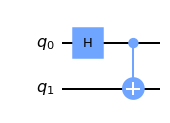

In [4]:
circ.draw('mpl')

In [5]:
#One can also draw this in markdown
circ.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

[This tutorial](https://qiskit.org/documentation/tutorials/circuits_advanced/03_advanced_circuit_visualization.html) covers many of the circuit visualization tools that are available.

A few of the basic gates which can be added to a quantum circuit are the:

* Pauli $X$, $Y$, $Z$ gates
* Hadamard $H$ gate
* $S$ (or $\pi/2$) phase gate
* $T$ (or $\pi/4$) phase gate
* Controlled-NOT (or Controlled-$X$) gate
* Controlled-$H$ gate
* CCX or Toffoli gate

among many others.  [This tutorial](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html) walks through many more which are available and demonstrates the syntax for each gate desired.

# Simulating a circuit and Executing on real hardware

Qiskit circuits can be simulated or run on real IBM hardware. Below is the list of real backends avaliable with your IBM accounts. 

In [20]:
IBMQ.load_account()


#List out all the backends avaiable from each provider you have access to
print()
for provider in IBMQ.providers():
    print('\n',provider)
    for backend in provider.backends():
        print(backend.name())
        
provider = IBMQ.get_provider(hub='ibm-q-education', group='ohio-uni-1', project='spring2022')

ibmqfactory.load_account:WARNING:2022-01-20 16:05:32,357: Credentials are already in use. The existing account in the session will be replaced.




 <AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>
ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila

 <AccountProvider for IBMQ(hub='ibm-q-education', group='ohio-uni-1', project='intro-quantum-co')>
ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_casablanca
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_jakarta
ibmq_manila
ibm_lagos
ibm_perth

 <AccountProvider for IBMQ(hub='ibm-q-education', group='ohio-uni-1', project='spring2022')>
ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_casablanca
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_jakarta
ibmq_manila
ibm_lagos
ibm_perth


***
Simulating a circuit that involves measurement requires us to add classical registers for the measurements to be stored to.

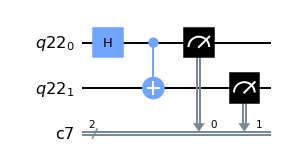

In [23]:
#Create the circuit
q = QuantumRegister(2)
c = ClassicalRegister(2)

qc = QuantumCircuit(q,c)
# can also write "qc = QuantumCircuit(2,2)"

#Add the hadamard and CNOT gates to the circuit
qc.h(0)
qc.cx(0, 1)

#add measurements
qc.measure(0,0)
qc.measure(1,1)

qc.draw('mpl')

Let's try simulating the measurement of circuit from before on the 'aer_simulator'.  This will simulate the quantum circuit on your local machine.  (Which is useful for testing out algorithms before sending it to the real thing!) 

In [18]:
#Define a backend object to run the circuit on
backend = Aer.get_backend('aer_simulator')

#If desired, we can also use ibm's cloud-based classical computers to simulate our circuit:
#backend = provider.get_backend('ibmq_qasm_simulator')

#Define the shots
shots = 8192

#run the job with the run method
job = backend.run(qc, shots=shots)

# get the results of the job
sim_results = job.result()


sim_counts = sim_results.get_counts(qc)

#Raw count data is stored in the Result object as a dict
print(sim_counts)

{'00': 4164, '11': 4028}


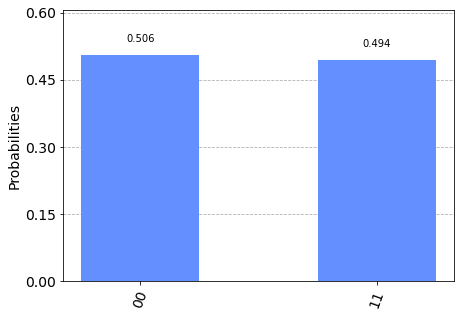

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(sim_counts)

We can also execute this circuit on real hardware by changing the backend and transpiling to be compatible with that backend.

In [10]:
#We will use the imb_lagos backend
backend = provider.get_backend('ibm_lagos')

initial_layout = [0,1]

qc_trans = transpile(qc, backend, initial_layout=initial_layout, optimization_level=3)

In [11]:
#To keep track of our job, we can use the job_monitor module in qiskit
from qiskit.tools import job_monitor

job = backend.run(qc_trans, shots=shots)
job_monitor(job)

#We can also print the id of the job.  Any job you submit to ibm's cloud services will have a unique job id.  These
# job ids can also be used to download the results data of your job at a later time
#job = backend.retrieve_job('JOB_ID')
print(job.job_id())

# get the results of the job
hardware_results = job.result()


hardware_counts = hardware_results.get_counts(qc_trans)

Job Status: job has successfully run
61e5e58b9710ff62c6de1108


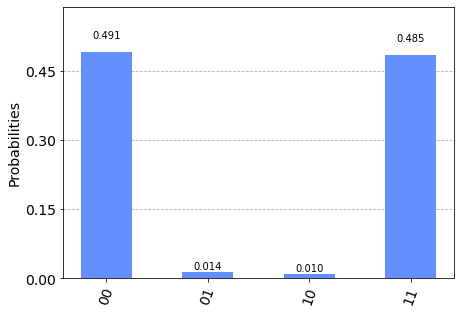

In [12]:
plot_histogram(hardware_counts)

As you can see the real hardware gives probability for states 01 and 10 which are not present in the simulations. There are ways to mitigate this error which will be discussed later. For now recognize that the hardware is prone to errors.